# Mid Bootcamp Project

### Predicting House Selling Prices

![title](Schema_2.jpg)

## Project details - regression

### Background:
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

### Objective:
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

### Data:
The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

* Id: Unique identification number for the property.
* date: date the house was sold.
* price: price of the house.
* waterfront: house which has a view to a waterfront.
* condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
* grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
* Sqft_above: square footage of house apart from basement.
* Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
* Sqft_lot15: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use linear regression for classification for building a model. You are also encouraged to use other models in your project including KNN, decision trees for regression. To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using matplotlib and seaborn for developing visualizations. The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables). You will also use tableau to visually explore the data further.

### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.

### Project Steps:

* Importing data into a SQL database
* Query the data from SQL
* Import Data into Python
* Perform EDA
* Create two models, get predictions and compare their performance
* Create a storyline with Tableau
* Upload project to GitHub

## Importing libraries

In [239]:
# Importing the Libraries
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
data = pd.read_csv('regression_data_clean.csv') 

## Exploring the data

In [3]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.shape

(21597, 21)

In [5]:
display(data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## Checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Change headers names

In [7]:
data.columns =data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## Replacing the index by the ID column 

In [8]:
data = data.set_index('id')

## Checking for null values

In [9]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,date,0.0
1,bedrooms,0.0
18,sqft_lot15,0.0
17,sqft_living15,0.0
16,long,0.0
15,lat,0.0
14,zipcode,0.0
13,yr_renovated,0.0
12,yr_built,0.0
11,sqft_basement,0.0


## Checking value counts from some columns

In [10]:
display(data['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
display(data['bathrooms'].value_counts())

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
display(data['sqft_lot15'].value_counts())

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

In [13]:
display(data['sqft_living15'].value_counts())

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [14]:
display(data['zipcode'].value_counts())

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [15]:
display(data['yr_renovated'].value_counts())

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
display(data['yr_built'].value_counts())

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [17]:
display(data['sqft_basement'].value_counts())

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [18]:
display(data['sqft_above'].value_counts())

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [19]:
display(data['grade'].value_counts())

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [20]:
display(data['condition'].value_counts())

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [21]:
display(data['view'].value_counts())

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [22]:
display(data['waterfront'].value_counts())

0    21434
1      163
Name: waterfront, dtype: int64

In [23]:
display(data['floors'].value_counts())

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [24]:
display(data['price'].value_counts())

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
788600      1
700180      1
436300      1
329800      1
435010      1
Name: price, Length: 3622, dtype: int64

## Checking the numerical values

In [25]:
numericals = data.select_dtypes([np.number])
numericals.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Check distributions to see if variables fit the theoretical normal or exponential distribution.

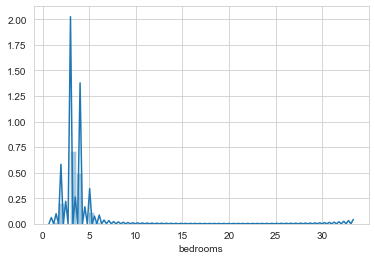

In [26]:
sns.distplot(numericals['bedrooms'])

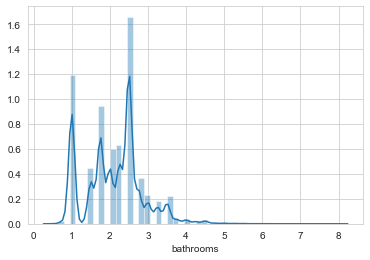

In [27]:
sns.distplot(numericals['bathrooms'])

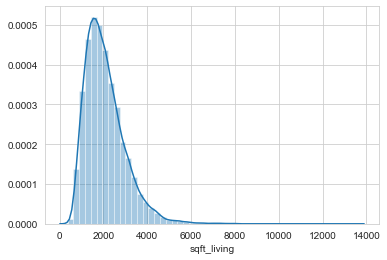

In [28]:
sns.distplot(numericals['sqft_living'])

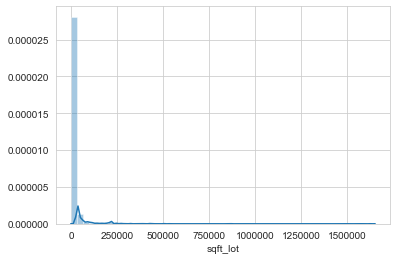

In [29]:
sns.distplot(numericals['sqft_lot'])

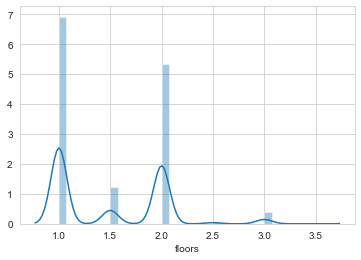

In [30]:
sns.distplot(numericals['floors'])

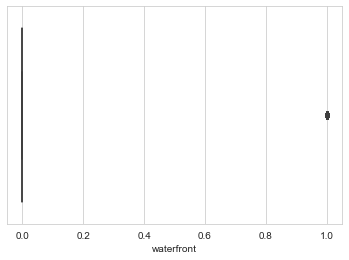

In [31]:
sns.boxplot(x=numericals['waterfront'])

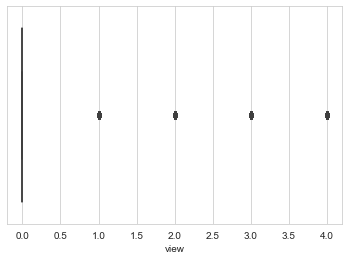

In [32]:
sns.boxplot(x=numericals['view'])

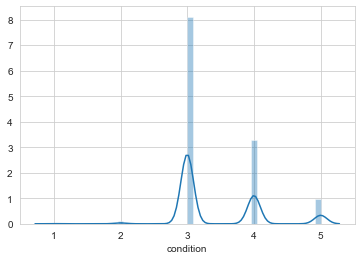

In [33]:
sns.distplot(numericals['condition'])

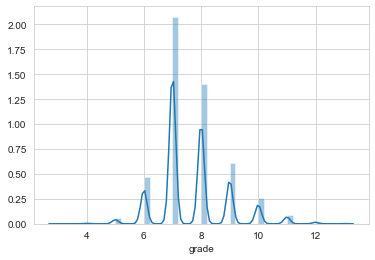

In [34]:
sns.distplot(numericals['grade'])

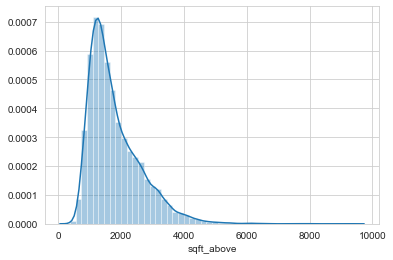

In [35]:
sns.distplot(numericals['sqft_above'])

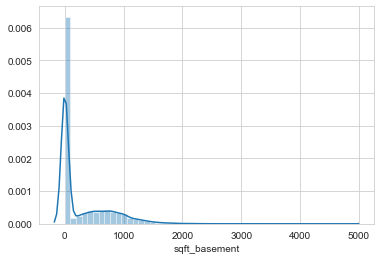

In [36]:
sns.distplot(numericals['sqft_basement'])

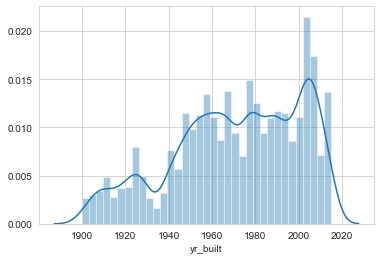

In [37]:
sns.distplot(numericals['yr_built'])

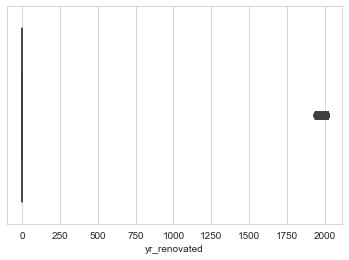

In [38]:
sns.boxplot(x=numericals['yr_renovated'])

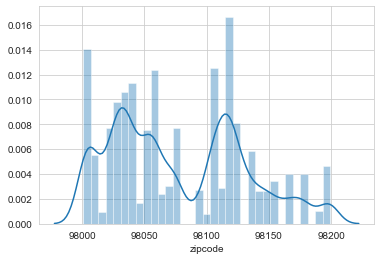

In [39]:
sns.distplot(numericals['zipcode'])

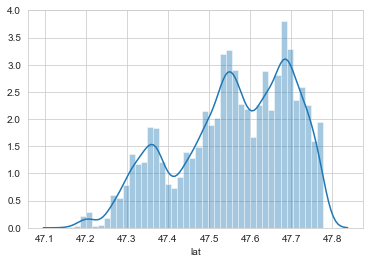

In [40]:
sns.distplot(numericals['lat'])

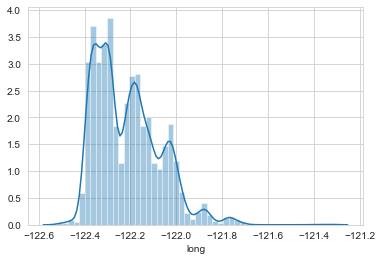

In [41]:
sns.distplot(numericals['long'])

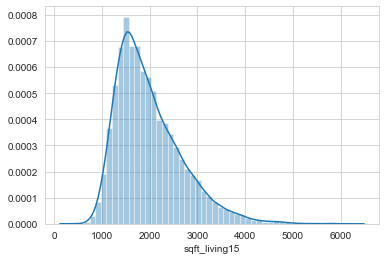

In [42]:
sns.distplot(numericals['sqft_living15'])

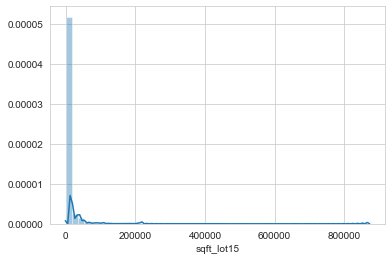

In [43]:
sns.distplot(numericals['sqft_lot15'])

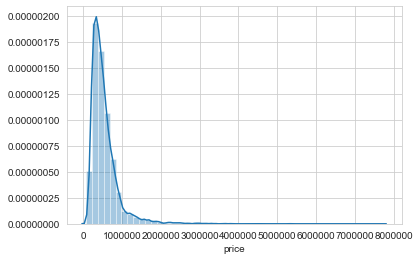

In [44]:
sns.distplot(numericals['price'])

Let's try some transformations to see if we can improve the distribution.

Remember that our function, ignored the '0' and infinite values. The may want to replace them the mean of the NEW distribution.

## Creating some functions to test Log and Sqrt transformations

In [45]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

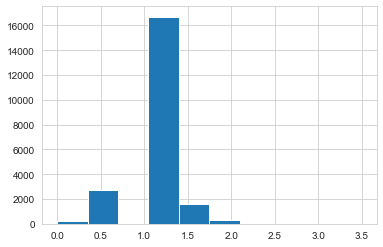

In [46]:
pd.Series(map(log_transfom_clean_, numericals['bedrooms'])).hist()
plt.show()

In [47]:
numericals['bedrooms'] = list(map(log_transfom_clean_, numericals['bedrooms']))

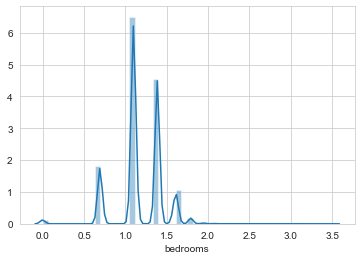

In [48]:
numericals['bedrooms'] = numericals['bedrooms'].fillna(np.mean(numericals['bedrooms']))
sns.distplot(numericals['bedrooms'])
plt.show()

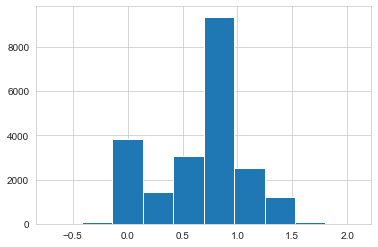

In [49]:
pd.Series(map(log_transfom_clean_, numericals['bathrooms'])).hist()
plt.show()

In [50]:
numericals['bathrooms'] = list(map(log_transfom_clean_, numericals['bathrooms']))

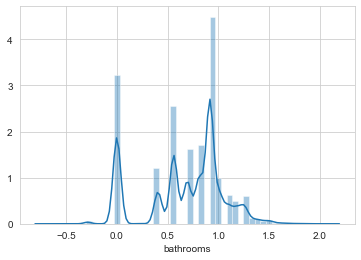

In [51]:
numericals['bathrooms'] = numericals['bathrooms'].fillna(np.mean(numericals['bathrooms']))
sns.distplot(numericals['bathrooms'])
plt.show()

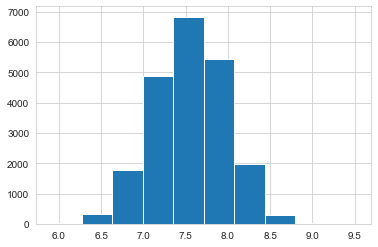

In [52]:
pd.Series(map(log_transfom_clean_, numericals['sqft_living'])).hist()
plt.show()

In [53]:
numericals['sqft_living'] = list(map(log_transfom_clean_, numericals['sqft_living']))

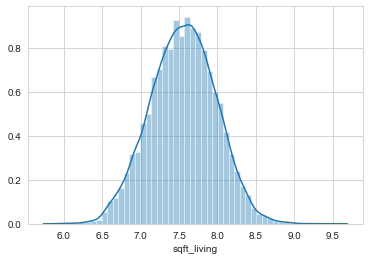

In [54]:
numericals['sqft_living'] = numericals['sqft_living'].fillna(np.mean(numericals['sqft_living']))
sns.distplot(numericals['sqft_living'])
plt.show()

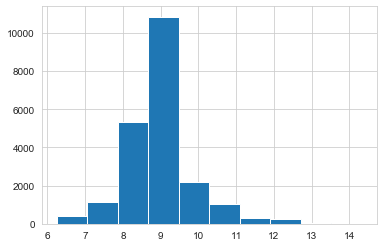

In [55]:
pd.Series(map(log_transfom_clean_, numericals['sqft_lot'])).hist()
plt.show()

In [56]:
numericals['sqft_lot'] = list(map(log_transfom_clean_, numericals['sqft_lot']))

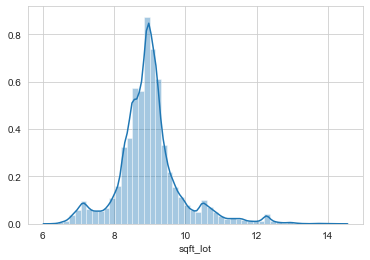

In [57]:
numericals['sqft_lot'] = numericals['sqft_lot'].fillna(np.mean(numericals['sqft_lot']))
sns.distplot(numericals['sqft_lot'])
plt.show()

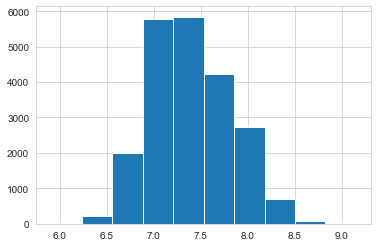

In [58]:
pd.Series(map(log_transfom_clean_, numericals['sqft_above'])).hist()
plt.show()

In [59]:
numericals['sqft_above'] = list(map(log_transfom_clean_, numericals['sqft_above']))

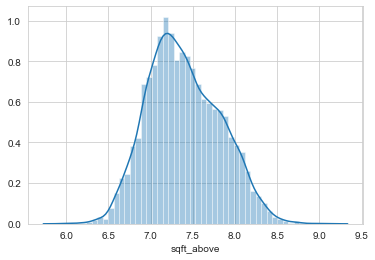

In [60]:
numericals['sqft_above'] = numericals['sqft_above'].fillna(np.mean(numericals['sqft_above']))
sns.distplot(numericals['sqft_above'])
plt.show()

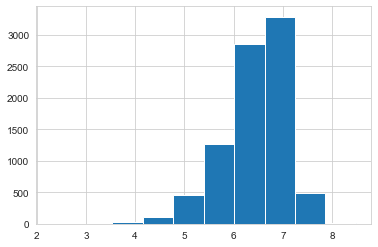

In [61]:
pd.Series(map(log_transfom_clean_, numericals['sqft_basement'])).hist()
plt.show()

In [62]:
numericals['sqft_basement'] = list(map(log_transfom_clean_, numericals['sqft_basement']))

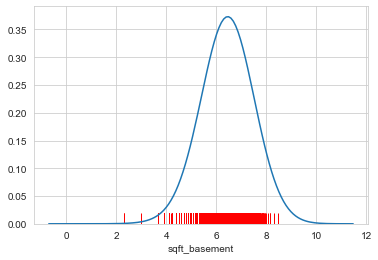

In [63]:
numericals['sqft_basement'] = numericals['sqft_basement'].fillna(np.mean(numericals['sqft_basement']))
sns.distplot(numericals['sqft_basement'], hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})
plt.show()

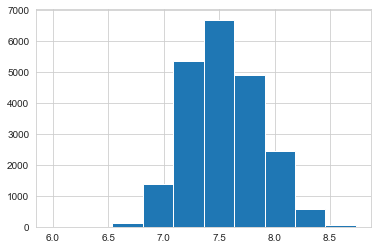

In [64]:
pd.Series(map(log_transfom_clean_, numericals['sqft_living15'])).hist()
plt.show()

In [65]:
numericals['sqft_living15'] = list(map(log_transfom_clean_, numericals['sqft_living15']))

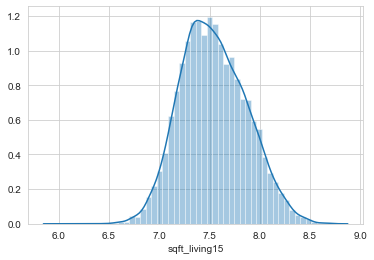

In [66]:
numericals['sqft_living15'] = numericals['sqft_living15'].fillna(np.mean(numericals['sqft_living15']))
sns.distplot(numericals['sqft_living15'])
plt.show()

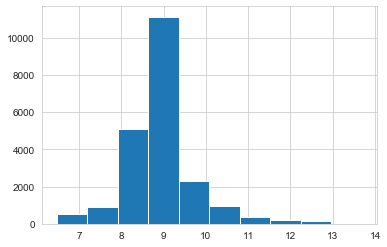

In [67]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, numericals['sqft_lot15'])).hist()
plt.show()

In [68]:
numericals['sqft_lot15'] = list(map(log_transfom_clean_, numericals['sqft_lot15']))

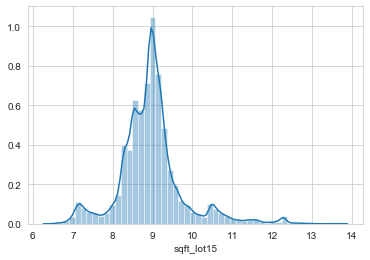

In [69]:
numericals['sqft_lot15'] = numericals['sqft_lot15'].fillna(np.mean(numericals['sqft_lot15']))
sns.distplot(numericals['sqft_lot15'])
plt.show()

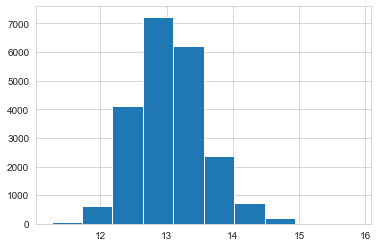

In [70]:
pd.Series(map(log_transfom_clean_, numericals['price'])).hist()
plt.show()

In [71]:
numericals['price'] = list(map(log_transfom_clean_, numericals['price']))

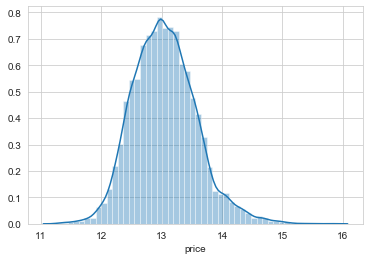

In [72]:
numericals['price'] = numericals['price'].fillna(np.mean(numericals['price']))
sns.distplot(numericals['price'])
plt.show()

### Visualizing the outliers

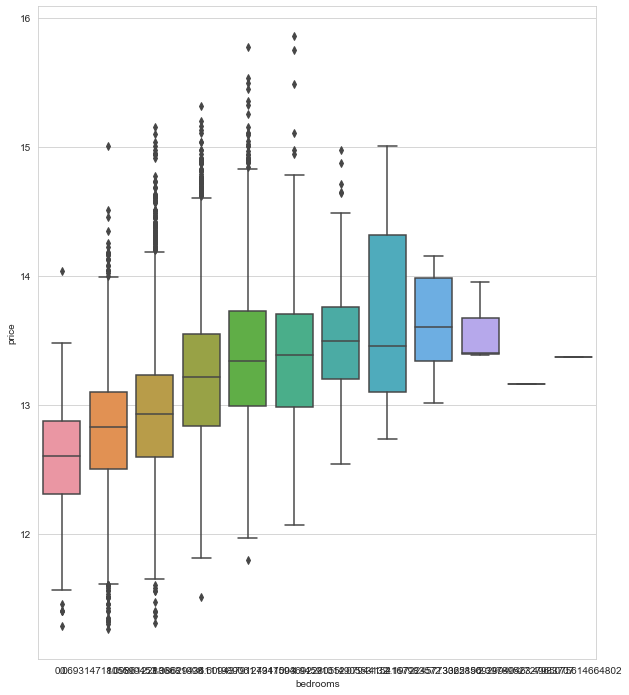

In [195]:
plt.figure(figsize=(10,12))
sns.boxplot(x='bedrooms',y='price',data=df)

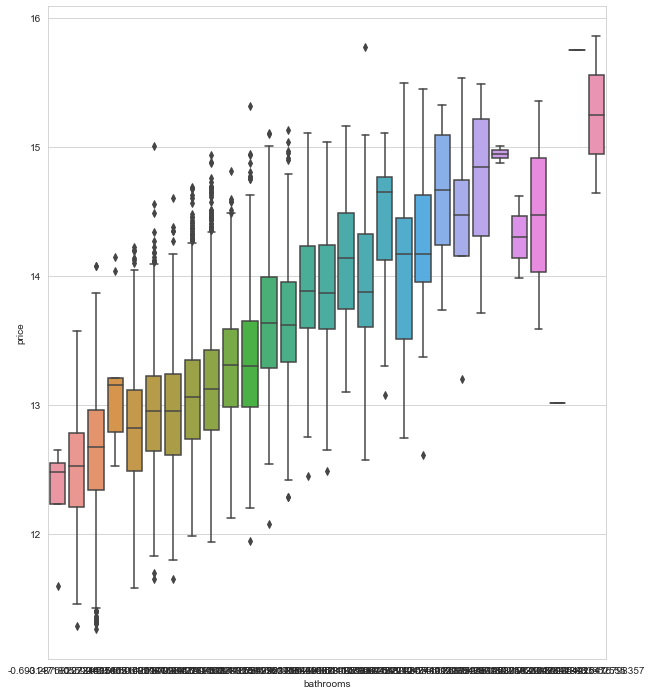

In [196]:
plt.figure(figsize=(10,12))
sns.boxplot(x='bathrooms',y='price',data=df)

In [212]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_living',y='price',data=df)

In [199]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_lot',y='price',data=df)

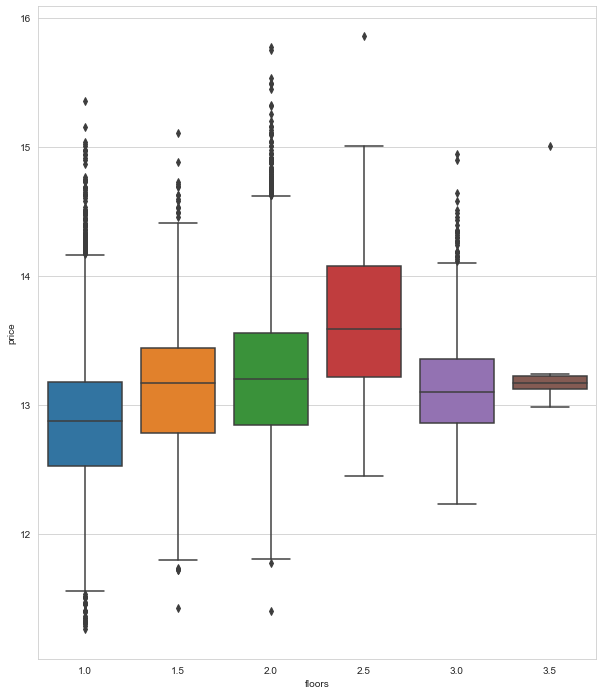

In [200]:
plt.figure(figsize=(10,12))
sns.boxplot(x='floors',y='price',data=df)

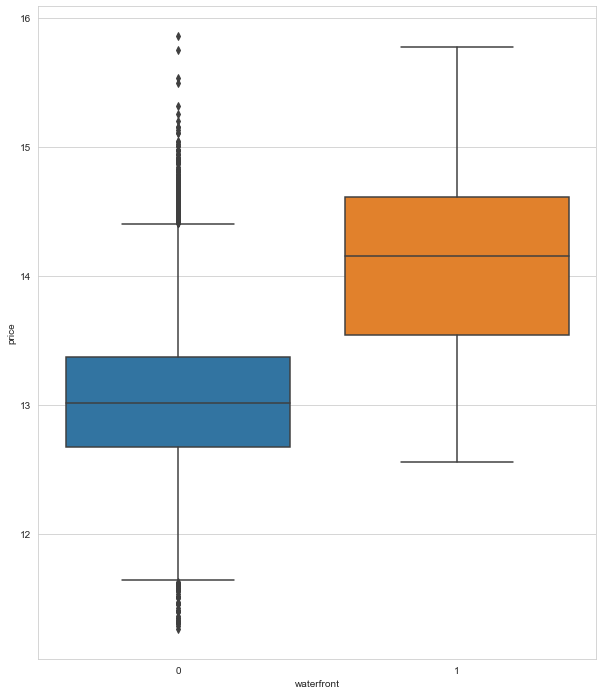

In [201]:
plt.figure(figsize=(10,12))
sns.boxplot(x='waterfront',y='price',data=df)

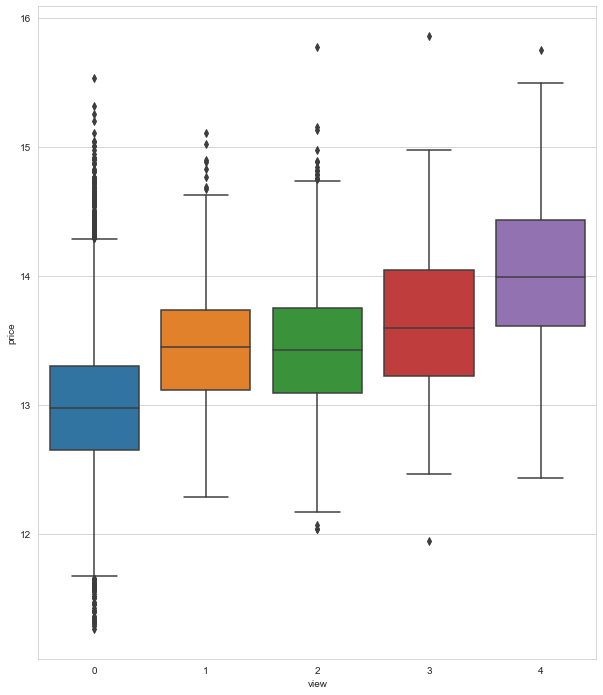

In [202]:
plt.figure(figsize=(10,12))
sns.boxplot(x='view',y='price',data=df)

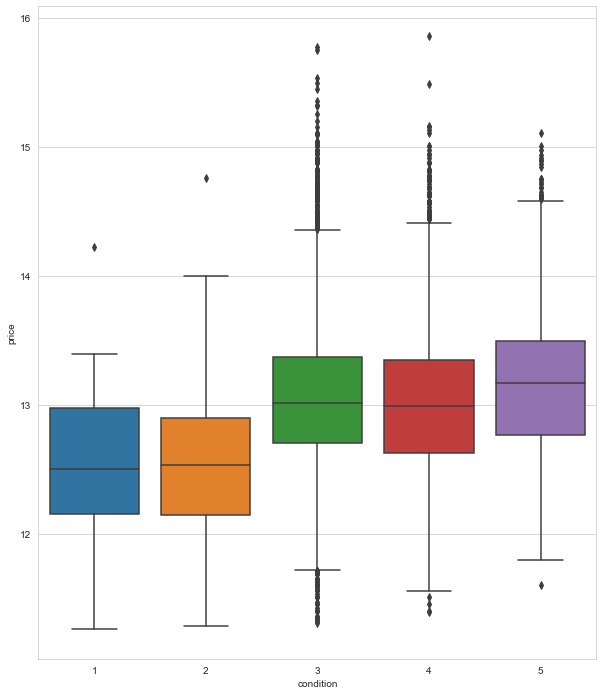

In [203]:
plt.figure(figsize=(10,12))
sns.boxplot(x='condition',y='price',data=df)

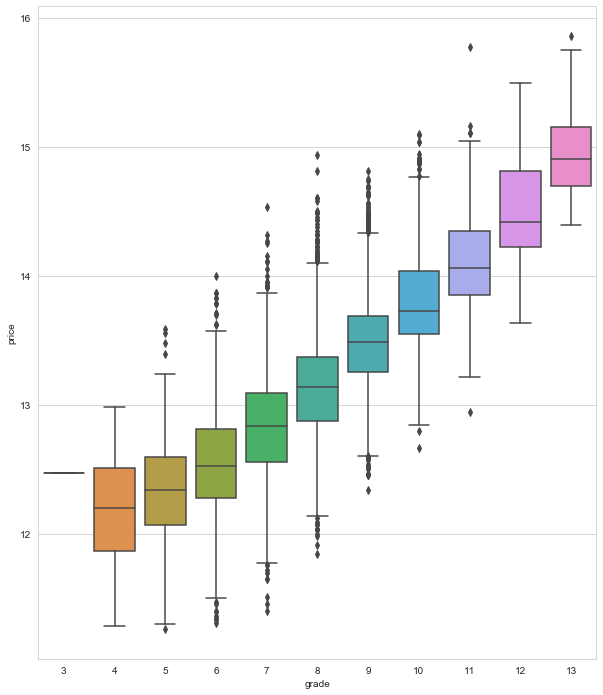

In [204]:
plt.figure(figsize=(10,12))
sns.boxplot(x='grade',y='price',data=df)

In [205]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_above',y='price',data=df)

In [206]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_basement',y='price',data=df)

KeyboardInterrupt: 

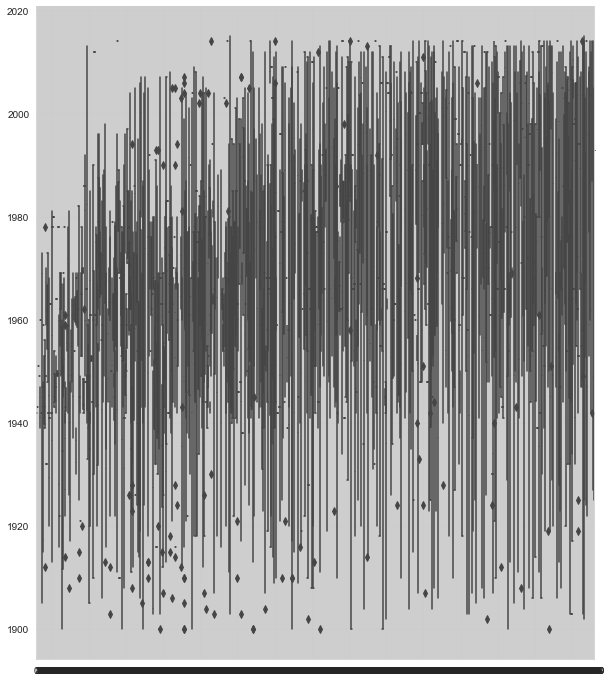

In [299]:
plt.figure(figsize=(10,12))
sns.boxplot(y='yr_built',x='price',data=df)

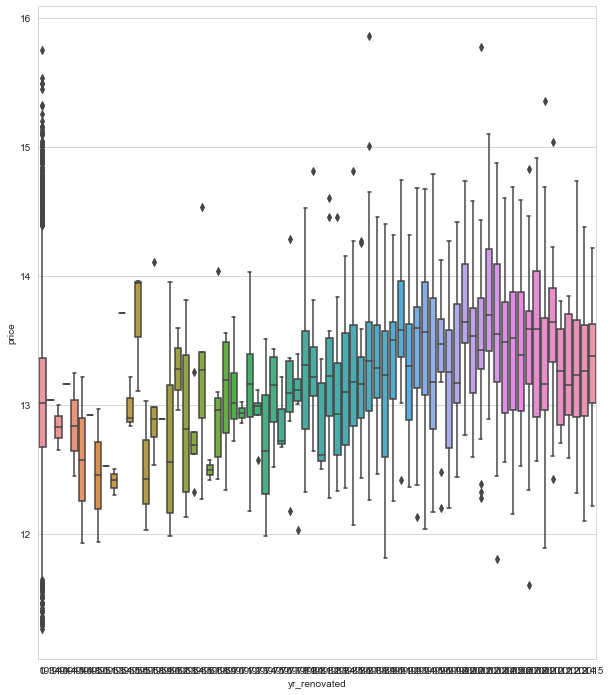

In [209]:
plt.figure(figsize=(10,12))
sns.boxplot(x='yr_renovated',y='price',data=df)

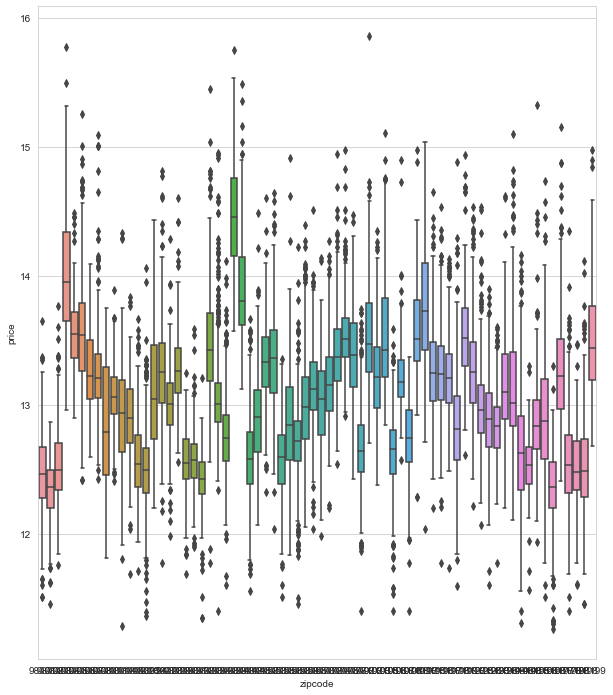

In [210]:
plt.figure(figsize=(10,12))
sns.boxplot(x='zipcode',y='price',data=df)

In [ ]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='lat',y='price',data=df)

In [ ]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='long',y='price',data=df)

In [ ]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_living_15',y='price',data=df)

In [ ]:
#plt.figure(figsize=(10,12))
#sns.boxplot(x='sqft_living_lot15',y='price',data=df)

## Plotting a correlation matrix

In [79]:
# Checking the Corr from original data
data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368


### Some insights

    sqft_living is very-highly correlated to sqft_above - 0.876448
    sqft_living is strongly correlated to bathrooms - 0.755758
    sqft_living is strongly correlated to grade - 0.762779	
    sqft_living is strongly correlated to sqft_living15 - 0.756402
    sqft_living is strongly correlated to price - 0.701917
    sqft_lot is strongly correlated to sqft_lot15 - 0.718204
    grade is strongly correlated to sqft_above - 0.756073
    sqft_above is strongly correlated to sqft_living15 - 0.731767

In [80]:
# Checking the Corr from transformed data
numericals.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.534008,0.648121,0.195969,0.190985,-0.013202,0.071564,0.026953,0.380427,0.546713,0.277743,0.194305,0.010516,-0.179868,-0.026784,0.156543,0.425690,0.175649,0.342850
bathrooms,0.534008,1.000000,0.760764,0.084877,0.501036,0.047783,0.159146,-0.113356,0.644204,0.683889,0.212111,0.534301,0.041612,-0.227636,0.011287,0.241492,0.570469,0.079120,0.520278
sqft_living,0.648121,0.760764,1.000000,0.325983,0.367564,0.079372,0.246890,-0.049620,0.743038,0.864979,0.378129,0.349689,0.050991,-0.222128,0.038820,0.257196,0.746836,0.303058,0.674802
sqft_lot,0.195969,0.084877,0.325983,1.000000,-0.237460,0.073863,0.122258,0.073694,0.184323,0.318663,0.245184,-0.007287,0.023650,-0.281688,-0.149182,0.376200,0.363743,0.918665,0.138261
floors,0.190985,0.501036,0.367564,-0.237460,1.000000,0.023755,0.028814,-0.264075,0.458794,0.547619,-0.099356,0.489193,0.006427,-0.059541,0.049239,0.125943,0.275476,-0.227223,0.310630
waterfront,-0.013202,0.047783,0.079372,0.073863,0.023755,1.000000,0.401971,0.016611,0.082888,0.060732,0.056124,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.078459,0.082658,0.174697
view,0.071564,0.159146,0.246890,0.122258,0.028814,0.401971,1.000000,0.045999,0.251728,0.158386,0.172823,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.264062,0.119512,0.346635
condition,0.026953,-0.113356,-0.049620,0.073694,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.150730,0.128641,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.089255,0.079862,0.038918
grade,0.380427,0.644204,0.743038,0.184323,0.458794,0.082888,0.251728,-0.146896,1.000000,0.742869,0.169046,0.447865,0.014261,-0.185771,0.113575,0.200341,0.689054,0.185000,0.703720
sqft_above,0.546713,0.683889,0.864979,0.318663,0.547619,0.060732,0.158386,-0.150730,0.742869,1.000000,0.184632,0.451397,0.026316,-0.290340,-0.019124,0.362044,0.713102,0.298696,0.586013


### Checking which features have the higher impact on the price:

In [81]:
# Checking the 'price' Corr from original data
df_p = data.corr()
df_p2 = df_p.sort_values(['price'], ascending=[False])
df_p2['price']

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

In [304]:
corr = pd.DataFrame(df_q2['price'])
corr

,price
price,1.000000
grade,0.703720
sqft_living,0.674802
sqft_living15,0.607154
sqft_above,0.586013
bathrooms,0.520278
lat,0.448837
view,0.346635
bedrooms,0.342850
floors,0.310630


In [302]:
# Checking the 'price' Corr from transformed data
df_q = numericals.corr()
df_q2 = df_q.sort_values(['price'], ascending=[False])
df_q2['price']

price            1.000000
grade            0.703720
sqft_living      0.674802
sqft_living15    0.607154
sqft_above       0.586013
bathrooms        0.520278
lat              0.448837
view             0.346635
bedrooms         0.342850
floors           0.310630
sqft_basement    0.204286
waterfront       0.174697
sqft_lot         0.138261
sqft_lot15       0.123710
yr_renovated     0.114485
yr_built         0.080583
long             0.050862
condition        0.038918
zipcode         -0.038788
Name: price, dtype: float64

## Checking the heatmap from transformed data

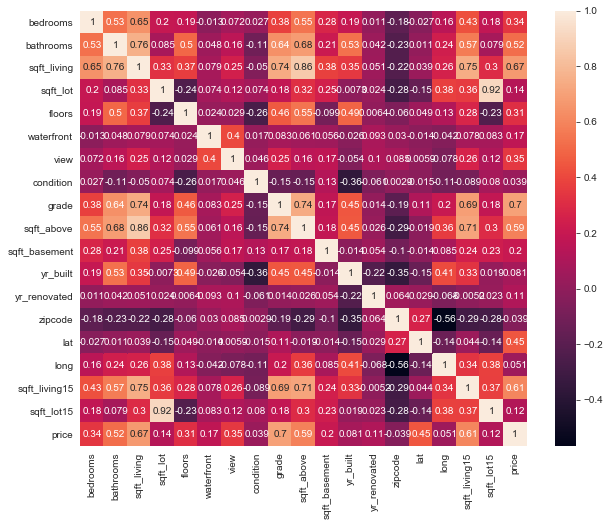

In [83]:
corr_matrix=numericals.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

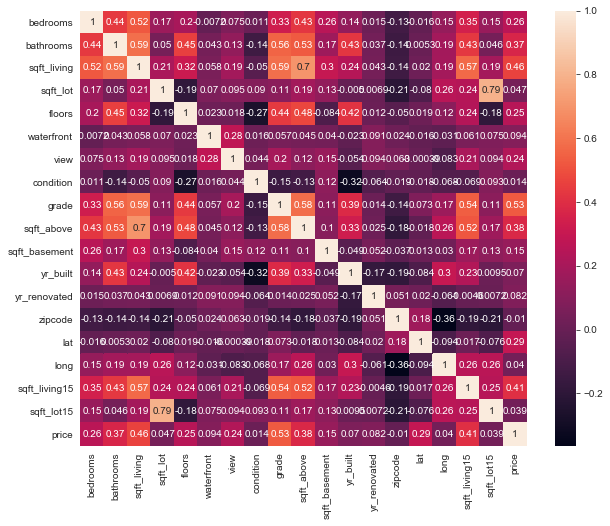

In [84]:
corr_matrix=numericals.corr(method='kendall')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

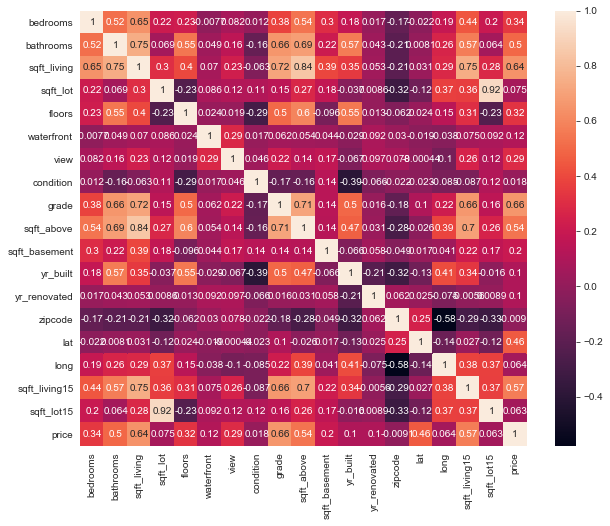

In [85]:
corr_matrix=numericals.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### As we can see, there are some variables highly correlated. In order to confirm this let's make scatter plots of pairs of correlated variables alongside with a linear regression.

### 1. 'sqft_lot' , 'sqft_lot15'

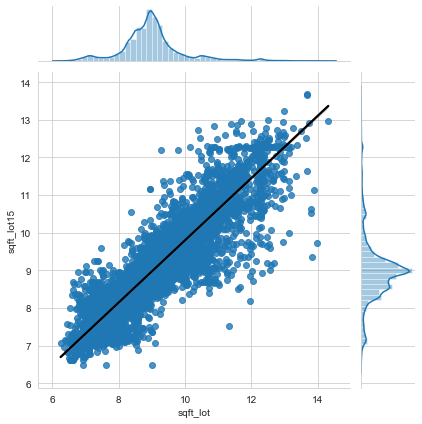

In [86]:
sns.jointplot(x="sqft_lot", y="sqft_lot15", data=numericals, kind='reg',joint_kws={'line_kws':{'color':'black'}})

In [87]:
model = LinearRegression().fit(numericals[['sqft_lot']], numericals[['sqft_lot15']])
model_r2 = model.score(numericals[['sqft_lot']], numericals[['sqft_lot15']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.844
The VIF of the model is: 6.408


### 2. 'sqft_living' , 'sqft_living15'

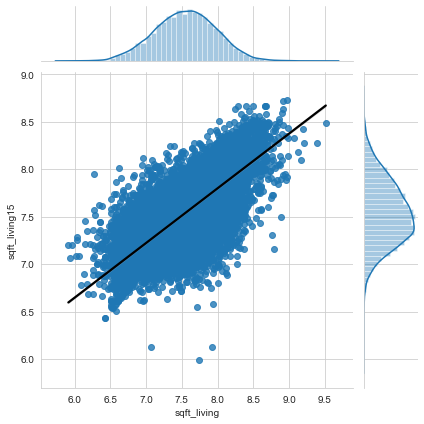

In [88]:
sns.jointplot(x="sqft_living", y="sqft_living15", data=numericals, kind='reg',joint_kws={'line_kws':{'color':'black'}})

In [89]:
model = LinearRegression().fit(numericals[['sqft_living']], numericals[['sqft_living15']])
model_r2 = model.score(numericals[['sqft_living']], numericals[['sqft_living15']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.558
The VIF of the model is: 2.261


### 3. 'sqft_above' , 'sqft_living'

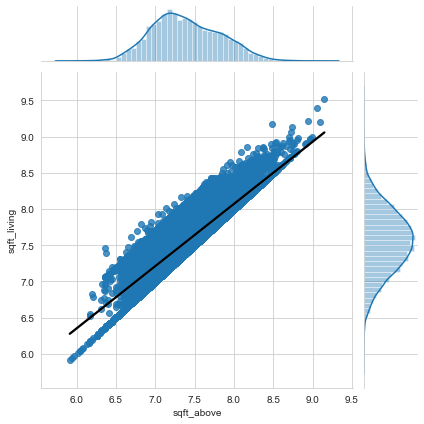

In [90]:
sns.jointplot(x="sqft_above", y="sqft_living", data=numericals, kind='reg',joint_kws={'line_kws':{'color':'black'}})

In [91]:
model = LinearRegression().fit(numericals[['sqft_above']], numericals[['sqft_living']])
model_r2 = model.score(numericals[['sqft_above']], numericals[['sqft_living']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.748
The VIF of the model is: 3.971


### 4. 'bathrooms' , 'sqft_living'

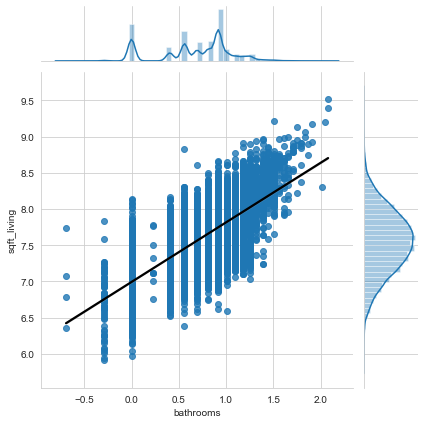

In [92]:
sns.jointplot(x="bathrooms", y="sqft_living", data=numericals, kind='reg',joint_kws={'line_kws':{'color':'black'}})

In [93]:
model = LinearRegression().fit(numericals[['bathrooms']], numericals[['sqft_living']])
model_r2 = model.score(numericals[['bathrooms']], numericals[['sqft_living']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.579
The VIF of the model is: 2.374


### Plot of the price per square foot

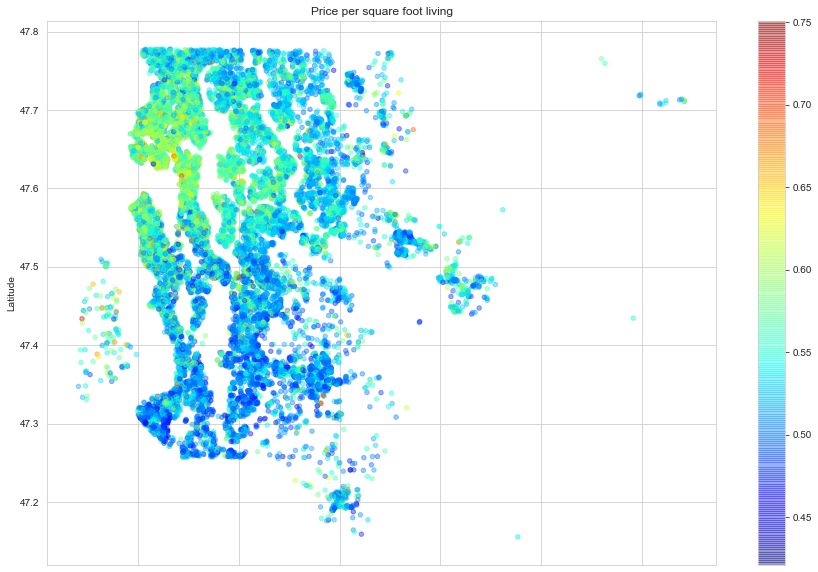

In [94]:
numericals.plot(kind="scatter", x="long", y="lat",
                      c=np.log(numericals['price']/numericals['sqft_living']), cmap=plt.get_cmap("jet"),
                      colorbar=True, alpha=0.4, figsize=(15,10))
plt.title('Price per square foot living')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



### Plot of year built

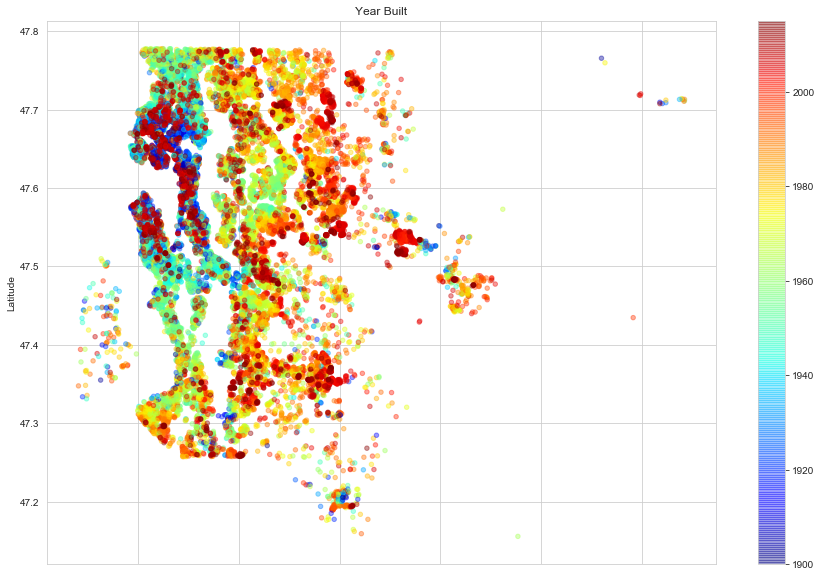

In [95]:
numericals.plot(kind="scatter", x="long", y="lat",
                      c=numericals['yr_built'], cmap=plt.get_cmap("jet"),
                      colorbar=True, alpha=0.4, figsize=(15,10))
plt.title('Year Built')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Using VIF to check  multicollinearity

In [96]:
def get_vif(exogs, data):
    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [97]:
# Checking the VIF with another approach
df = pd.DataFrame(numericals)
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.894618,-0.369721,-1.299675,0.047762,0.127085,0.048163,0.087366,-0.060107,0.278993,-0.243525,-0.039707,0.156041,0.054933,0.097383,-0.030124,0.071030,0.083848,0.027999,0.232308
bathrooms,-0.369721,3.446957,-2.300121,0.089134,-0.563274,0.020032,-0.018263,-0.177725,-0.063272,0.771233,0.093362,-1.067446,-0.272947,0.067759,0.090951,-0.009718,-0.012597,0.157648,-0.300885
sqft_living,-1.299675,-2.300121,9.661835,-0.310568,1.103150,0.087572,-0.097451,-0.027584,-0.506274,-4.854950,-1.218423,0.178071,0.036300,-0.394274,0.299673,0.271491,-0.961459,0.201534,-1.330748
sqft_lot,0.047762,0.089134,-0.310568,6.985860,0.614007,0.034704,-0.059817,0.170974,0.105161,-0.822770,-0.080229,0.421137,0.092768,0.072016,0.195304,-0.319441,0.270369,-5.890723,-0.125809
floors,0.127085,-0.563274,1.103150,0.614007,2.444199,-0.030419,0.000276,0.110679,-0.082033,-2.029268,0.065987,-0.435366,-0.068620,-0.193866,0.017193,-0.013696,0.201594,0.194157,-0.222736
waterfront,0.048163,0.020032,0.087572,0.034704,-0.030419,1.226076,-0.459371,0.011451,0.143010,-0.048693,-0.002473,-0.084164,-0.055762,0.002926,0.107086,0.040393,0.094009,-0.129979,-0.286217
view,0.087366,-0.018263,-0.097451,-0.059817,0.000276,-0.459371,1.447012,0.008687,-0.087257,0.273906,-0.100232,0.064032,-0.029336,-0.174648,0.270553,0.070271,-0.224827,-0.005682,-0.443188
condition,-0.060107,-0.177725,-0.027584,0.170974,0.110679,0.011451,0.008687,1.293421,0.105442,0.142806,-0.088121,0.522626,0.227962,0.137711,0.175628,0.002676,0.152526,-0.214355,-0.329492
grade,0.278993,-0.063272,-0.506274,0.105161,-0.082033,0.143010,-0.087257,0.105442,3.777771,-0.780018,0.057930,-0.894655,-0.006838,-0.038324,0.265312,0.309156,-0.527955,-0.166562,-1.644487
sqft_above,-0.243525,0.771233,-4.854950,-0.822770,-2.029268,-0.048693,0.273906,0.142806,-0.780018,7.206870,0.655329,-0.068594,-0.046950,0.192416,0.289869,-0.488934,-0.416185,-0.011413,-0.030571


In [98]:
# Checking the VIF without removing the target
get_vif(numericals, numericals)

,VIF,Tolerance
bedrooms,1.894618,0.527811
bathrooms,3.446957,0.290111
sqft_living,9.661835,0.103500
sqft_lot,6.985860,0.143146
floors,2.444199,0.409132
waterfront,1.226076,0.815610
view,1.447012,0.691079
condition,1.293421,0.773143
grade,3.777771,0.264706
sqft_above,7.206870,0.138756


In [99]:
# Checking the VIF removing the target
numericals_7 = numericals.copy()
numericals_7 = numericals_7.drop('price', axis=1)
get_vif(numericals_7, numericals_7)

,VIF,Tolerance
bedrooms,1.882329,0.531257
bathrooms,3.426342,0.291856
sqft_living,9.258583,0.108008
sqft_lot,6.982256,0.143220
floors,2.432902,0.411032
waterfront,1.207422,0.828211
view,1.402286,0.713121
condition,1.268700,0.788209
grade,3.161962,0.316259
sqft_above,7.206657,0.138761


In [100]:
def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [101]:
# Checking the VIF with sklearn without removing the target
sklearn_vif(numericals, numericals)

,VIF,Tolerance
bedrooms,1.894618,0.527811
bathrooms,3.446957,0.290111
sqft_living,9.661835,0.103500
sqft_lot,6.985860,0.143146
floors,2.444199,0.409132
waterfront,1.226076,0.815610
view,1.447012,0.691079
condition,1.293421,0.773143
grade,3.777771,0.264706
sqft_above,7.206870,0.138756


In [102]:
# Checking the VIF with sklearn without removing the target
sklearn_vif(numericals_7, numericals)

,VIF,Tolerance
bedrooms,1.882329,0.531257
bathrooms,3.426342,0.291856
sqft_living,9.258583,0.108008
sqft_lot,6.982256,0.143220
floors,2.432902,0.411032
waterfront,1.207422,0.828211
view,1.402286,0.713121
condition,1.268700,0.788209
grade,3.161962,0.316259
sqft_above,7.206657,0.138761


# Standard Initial Approach

In [290]:
def apply_model(df, pptype, mod_reg):
    
    #Split
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    #Preprocessing
    if pptype == 'Normalizer':
        transformer = Normalizer().fit(X_train.iloc[:,:-1])
        X_train = transformer.transform(X_train.iloc[:,:-1])
        X_test = transformer.transform(X_test.iloc[:,:-1])
    elif pptype == 'StandardScaler':
        transformer = StandardScaler().fit(X_train.iloc[:,:-1])
        X_train = transformer.transform(X_train.iloc[:,:-1])
        X_test = transformer.transform(X_test.iloc[:,:-1])
    elif pptype == 'MinMaxScaler':
        transformer = MinMaxScaler().fit(X_train.iloc[:,:-1])
        X_train = transformer.transform(X_train.iloc[:,:-1])
        X_test = transformer.transform(X_test.iloc[:,:-1])
    else:
        transformer = RobustScaler().fit(X_train.iloc[:,:-1])
        X_train = transformer.transform(X_train.iloc[:,:-1])
        X_test = transformer.transform(X_test.iloc[:,:-1])
        
    #Training
    mr = mod_reg
    mr_model = mr.fit(X_train,y_train)
    mr_predictions = mr_model.predict(X_test)
    MAE = mean_absolute_error(y_test,mr_predictions)
    MSE = mean_squared_error(y_test,mr_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,mr_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

In [297]:
apply_model(numericals, Normalizer, LinearRegression)

TypeError: fit() missing 1 required positional argument: 'y'

## Splitting data intro train and test sets.

In [300]:
X = numericals.iloc[:,:-1]
y = numericals.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Preprocessing type - Normalizer

In [301]:
transformer = Normalizer().fit(X_train.iloc[:,:-1])
X_train = transformer.transform(X_train.iloc[:,:-1])
X_test = transformer.transform(X_test.iloc[:,:-1])

### Preprocessing type - StandardScaler

In [180]:
transformer = StandardScaler().fit(X_train.iloc[:,:-1])
X_train = transformer.transform(X_train.iloc[:,:-1])
X_test = transformer.transform(X_test.iloc[:,:-1])

### Preprocessing type - MinMaxScaler

In [227]:
transformer = MinMaxScaler().fit(X_train.iloc[:,:-1])
X_train = transformer.transform(X_train.iloc[:,:-1])
X_test = transformer.transform(X_test.iloc[:,:-1])

### Preprocessing type - RobustScaler

In [251]:
transformer = RobustScaler().fit(X_train.iloc[:,:-1])
X_train = transformer.transform(X_train.iloc[:,:-1])
X_test = transformer.transform(X_test.iloc[:,:-1])

In [252]:
#  Checking the results
display(X_train)

array([[0.31420275, 0.54248125, 0.4650479 , ..., 0.86462882, 0.32641196,
        0.57801435],
       [0.31420275, 0.72672265, 0.46781173, ..., 0.85395439, 0.15531561,
        0.54478392],
       [0.31420275, 0.58048202, 0.46918354, ..., 0.23483746, 0.13953488,
        0.66560384],
       ...,
       [0.31420275, 0.39624063, 0.40661951, ..., 0.27365357, 0.15863787,
        0.4967221 ],
       [0.31420275, 0.54248125, 0.44639069, ..., 0.26815462, 0.13704319,
        0.5723661 ],
       [0.46029871, 0.75      , 0.61537048, ..., 0.5835355 , 0.26162791,
        0.5666289 ]])

## Training the K-NN model

In [253]:
knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [254]:
knn_predictions = knn_model.predict(X_test)

## Getting the error metrics of our K-NN model

In [255]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.15
The mean squared error of the model in the test set is:   0.04
The root mean squared error of the model in the test set is:   0.21
The R2 of the model in the test set is: 0.84


###  Getting the error metrics of our Linear regression

In [256]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [257]:
lm_predictions = lm_model.predict(X_test)

In [258]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.19
The mean squared error of the model in the test set is:   0.06
The root mean squared error of the model in the test set is:   0.25
The R2 of the model in the test set is: 0.77


### Defining a function to test other regressors

In [259]:
def model_testing(mod_reg):
    mr = mod_reg
    mr_model = mr.fit(X_train,y_train)
    mr_predictions = mr_model.predict(X_test)
    MAE = mean_absolute_error(y_test,mr_predictions)
    MSE = mean_squared_error(y_test,mr_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,mr_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

#### MLPRegressor

In [260]:
model_testing(MLPRegressor())

The mean absolute error of the model in the test set is:   0.15
The mean squared error of the model in the test set is:   0.04
The root mean squared error of the model in the test set is:   0.20
The R2 of the model in the test set is: 0.86


#### RandomForest

In [261]:
model_testing(RandomForestRegressor())

The mean absolute error of the model in the test set is:   0.13
The mean squared error of the model in the test set is:   0.03
The root mean squared error of the model in the test set is:   0.18
The R2 of the model in the test set is: 0.88


In [292]:
model_testing(KNeighborsRegressor(n_neighbors=4))

The mean absolute error of the model in the test set is:   0.15
The mean squared error of the model in the test set is:   0.04
The root mean squared error of the model in the test set is:   0.21
The R2 of the model in the test set is: 0.84


In [293]:
model_testing(LinearRegression)

TypeError: fit() missing 1 required positional argument: 'y'